In [ ]:
# This Created by KurtyMittens (Kurt Russel A. Villamor), PADRIGANO JOHN LLOYD, MARQUEZ CLARD JOZREIN

# **CASE STUDY**

## - **You’re  an appliances supplier and you want to ship the items from your warehouse to Give to your distributor and sell is As soon as Possible. You have a Forklift that can carry all items in one aisle at a time, You also has a truck that has 10000kg capacity weight which is the storage of your items picked. You have a warehouse that has 6 aisles with different items. Your goal is to get the most preferable items in an aisle and putting it to the truck considering the how many minutes you consume in the process. (Assuming the minutes are constant and picking time is not considered)**

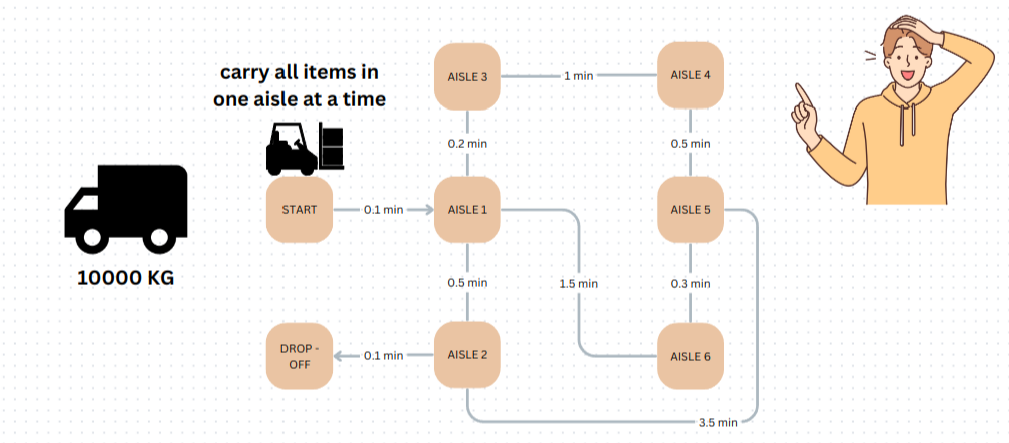

## **- This is the list of the Items in the Warehouse, it has the aisle number and the weight and price as needed to sucessfully run a knapsack approach**


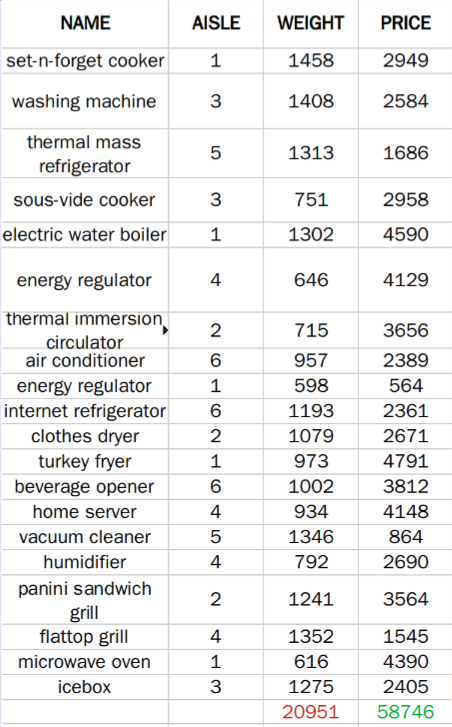

# **ANSWER**

## This problem can be solved by using Knapsack techniques, Graphs, and the use of Dynamic programming. In this we started in creating this guidelines and steps of Algorithms.

## **ALGORITHMS**
1. **START**
2. **PERFORM KNAPSACK TO THE ITEMS TO ABLE TO PUT IN THE TRUCK**
3. **SAVE THE KNAPSACK AS IT SERVES AS THE LIST FOR YOUR TRAVEL IN THE WAREHOUSE**
4. **CREATE A GRAPH THAT IS SAME TO THE FIGURE ABOVE**
5. **IDENTIFY THE FASTEST WAY TO GET ALL THE ITEMS**
6. **OUTPUT THE ITEMS NEEDED TO GET AND ORDER OF PATH TO GET IT.**

**WITH THIS ALGORITM, WE CAN START THE CODING PROCESS...**

- **First, Lets Create a class tthat will handle the items**

In [ ]:
class Items:
  def __init__(self, name, aisle, price, weight): # Parameters for the Name(str), aisle(int),price(int),and weight(int)
    self.__name = name
    self.__aisle = aisle
    self.__price = price
    self.__weight = weight

  def get_name(self): # It gets the the encapsulated name
    return self.__name

  def get_aisle(self):  # It gets the the encapsulated aisle
    return self.__aisle

  def get_price(self):  # It gets the the encapsulated price
    return self.__price

  def get_weight(self):  # It gets the the encapsulated weight
    return self.__weight

- **We also need to create a menu list so that all of the Items are organized well**

In [ ]:
def menu_of_items(arrOfNames, arrOfAisle,arrOfPrice,arrOfWeight):
  items = []
  for i in range(len(arrOfNames)):
    items.append(Items(arrOfNames[i], arrOfAisle[i], arrOfPrice[i], arrOfWeight[i]))
  return items

- **Now We made inndividual array per category but using the Class and the function, we can store it efficiently.**

In [ ]:
# list of the items in the Warehouse
items = ["set-n-forget cooker", "washing machine", "thermal mass refrigerator", "sous-vide cooker", "electric water boiler",
          "energy regulator", "thermal immersion circulator","air conditioner", "energy regulator", "internet refrigerator",
          "clothes dryer", "turkey fryer", "beverage opener", "home server", "vacuum cleaner",
          "humidifier", "panini sandwich grill","flattop grill","microwave oven","icebox"]

aisle = [1,3,5,3,1,
         4,2,6,1,6,
         2,1,6,4,5,
         4,2,4,1,3]

price = [2949,2584,1686,2958,4590,
         4129,3656,2389,564,2361,
         2671,4791,3812,4148,864,
         2690,3564,1545,4390,2405]

weight = [1458,1408,1313,751,1302,
          646,715,957,598,1193,
          1079,973,1002,934,1346,
          792,1241,1352,616,1275]

capacity = 10000 # for the capacity of the truck

- **Lets Feed in the data**

In [ ]:
item_menu = menu_of_items(items, aisle, price, weight) # This variable will be sent to the kanpsack function

print(item_menu) # Checking the Items in the List

- **Let's Now Create a knapsack function for the data and the truck, and this also stores the aisle of the items to be picked**

In [ ]:
def tab_knapsack(cap,items): # it accepts the Item class list we created
  n = len(items)
  table = [[0 for i in range(cap+1)] for i in range(n+1)]  # the use of tabulation Method
  for i in range(n+1):
    for j in range(cap+1):
      if i == 0 or j == 0:
        table[i][j] = 0
      elif items[i-1].get_weight() <= j:  # the the capacity can handle the weight of an item, then add to the table
        table[i][j] = max(items[i-1].get_price() + table[i-1][j - items[i-1].get_weight()], table[i-1][j])

  k = n
  l = cap
  while k > 0 and l > 0: # this loop for for analyzing the table populated with our data and print the items included or not
    if table[k][l] == table[k-1][l]:
      items.remove(items[k-1]) # It removes the item that is not Included to the knapsack
      k-=1
    else:
      k-=1
      l-=items[k].get_weight()

  items.sort(key=lambda x: x.get_aisle()) # sorting the items by Aisle
  aisles = []
  for i in items:
    print(f"{i.get_name()}, is in aisle {i.get_aisle()}, {i.get_weight()}") # Prints the items you include for the truck
    aisles.append(i.get_aisle())
  return list(set(aisles)) # Returns the list of the aisles that the items is in

- **Now let's Proceed to feeding the items_menu to the knapsack**

In [ ]:
aisle = tab_knapsack(capacity, item_menu) # Display the Included Items, Their Aisle Num and the Weight (For Checking).

- Checking the List of the aisle needed to be past through.

In [ ]:
print(aisle)

- **Now lets Proceed to the graph part...**

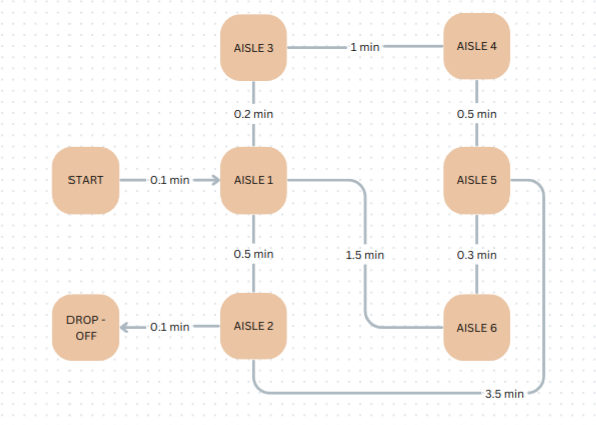

- **We decided to take the simple route in making graph, example is creating a dictionary to represent the graph and corresponding time in connecting edges**

In [ ]:
# STRUCTURE:
# { VERTICES: (EDGES, CORRESPONDING TIME FOR EDGE)}
g = { "START" : [(1,0.1)],
      1 : [(3,0.2),(2,0.5),(6,1.5)],
      2 : [(1, 0.5), (5, 3.5), ("DROP OFF", 0.1)],
      3 :[[1, 0.2], (4, 1)],
      4 : [(3,1),(5, 0.5)],
      5 : [(2, 3.5),(6, 0.3)],
      6 : [(1, 1.5),(5,0.3)],
      "DROP OFF":[]
    }

- **Let's Create a Class that Implements this graph**

In [ ]:
class Graph:
    def __init__(self, graph_dict=None): # It accepts parameters of a graph dictionary, if theres None it creates One.
        """ initializes a graph object
            If no dictionary or None is given,
            an empty dictionary will be used
        """
        if graph_dict == None:
            graph_dict = {}
        self._graph_dict = graph_dict

    def edges(self, vertice): # Gets all the Edges of a certain vertice
        """ returns a list of all the edges of a vertice"""
        return [i for i in self._graph_dict[vertice]]

    def __generate_edges(self):
        """ A static method generating the edges of the
            graph "graph". Edges are represented as sets
            with one (a loop back to the vertex) or two
            vertices
        """
        edges = []
        for vertex in self._graph_dict:
            for neighbour in self._graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges

    def find_all_paths(self, start_vertex, end_vertex, path=[], sums=0):
        """ find all paths from start_vertex to
            end_vertex in graph """
        graph = self._graph_dict
        path = path + [start_vertex]
        if start_vertex == end_vertex:  # THE BASE CASE, when this is satisfied, it returns all the posible paths, additional the total time of the path to be finished (based on the time in the edges)
            return path, sums
        if start_vertex not in graph: # If vertex is not their, then give them nothing
            return []
        paths = []
        for vertex in graph[start_vertex]:
            if vertex[0] not in path:
                extended_paths = self.find_all_paths(vertex[0], end_vertex, path, sums + vertex[1]) # RECURSIVE
                for p in extended_paths:
                    paths.append(p)
                self.sums = 0
        return paths

    def total_mins(self, paths):
        records = {}
        for i in range(len(paths)):
            if type(paths[i]) == list: # If the current Item is array, then it is recorded as a value of the path index (path identified by the find_all_paths())
                records[len(records)] = [paths[i],paths[i+1]]
        return records

    def fastest_way(self, aisles, total_min):
        table = [[0 for i in range(len(total_min))] for i in range(len(aisles))]
        for i in range(len(aisles)):
          for j in range(len(total_min)):
            if aisles[i] in total_min[j][0]:
              table[i][j] += total_min[j][1]

        minimum_routes = []
        print(table)
        for i in table:
          smallest_time = min(num for num in i if num > 0)
          s = i.index(smallest_time)
          minimum_routes.append(s)

        return minimum_routes

- **Let's Add One additional Essiantial Codes**

In [ ]:
   """
    def edges(self, vertice): # Gets all the Edges of a certain vertice
        "" returns a list of all the edges of a vertice""
        return [i for i in self._graph_dict[vertice]]

    def __generate_edges(self):
        "" A static method generating the edges of the
            graph "graph". Edges are represented as sets
            with one (a loop back to the vertex) or two
            vertices
        ""
        edges = []
        for vertex in self._graph_dict:
            for neighbour in self._graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges
        """

- **So The First goal is to Identify all the Possible routes from START to the DROP OFF point. so We are going to add a recursive function to find the routes.**

In [ ]:
   """ def find_all_paths(self, start_vertex, end_vertex, path=[], sums=0):
        ""find all paths from start_vertex to
            end_vertex in graph ""
        graph = self._graph_dict
        path = path + [start_vertex]
        if start_vertex == end_vertex:  # THE BASE CASE, when this is satisfied, it returns all the posible paths, additional the total time of the path to be finished (based on the time in the edges)
            return path, sums
        if start_vertex not in graph: # If vertex is not their, then give them nothing
            return []
        paths = []
        for vertex in graph[start_vertex]:
            if vertex[0] not in path:
                extended_paths = self.find_all_paths(vertex[0], end_vertex, path, sums + vertex[1]) # RECURSIVE
                for p in extended_paths:
                    paths.append(p)
                self.sums = 0
        return paths"""

- **With The Output of the finding all paths, we need to fixed it to make us understand more the process, so that this function fixes this paths to be a dictionary, noting that this paths are key for noting the paths.**

In [ ]:
    """
    def total_mins(self, paths):
        records = {}
        for i in range(len(paths)):
            if type(paths[i]) == list: # If the current Item is array, then it is recorded as a value of the path index (path identified by the find_all_paths())
                records[len(records)] = [paths[i],paths[i+1]]
        return records
        """

- **And Now we will find the fastest way to get all the items in the using the minimal  value in the array. (Greedy Method- getting the Lowest possible time possible)

In [ ]:
  """
    def fastest_way(self, aisles, total_min):
        table = [[0 for i in range(len(total_min))] for i in range(len(aisles))]
        for i in range(len(aisles)):
          for j in range(len(total_min)):
            if aisles[i] in total_min[j][0]:
              table[i][j] += total_min[j][1]

        minimum_routes = []
        print(table)
        for i in table:
          smallest_time = min(num for num in i if num > 0)
          s = i.index(smallest_time)
          minimum_routes.append(s)

        return minimum_routes
        """

# For the Results, we will be provided a fastest order of path getting items in a particular Aisle.

In [ ]:
graph = Graph(g)
path = graph.find_all_paths('START', 'DROP OFF') # All Possible Paths
dicxts = graph.total_mins(path)
print(dicxts) # The Dictionary Created
print(graph.fastest_way(aisle, dicxts)) # The Order of the fastest way to get all the items in the warehouse